### Treść zadania

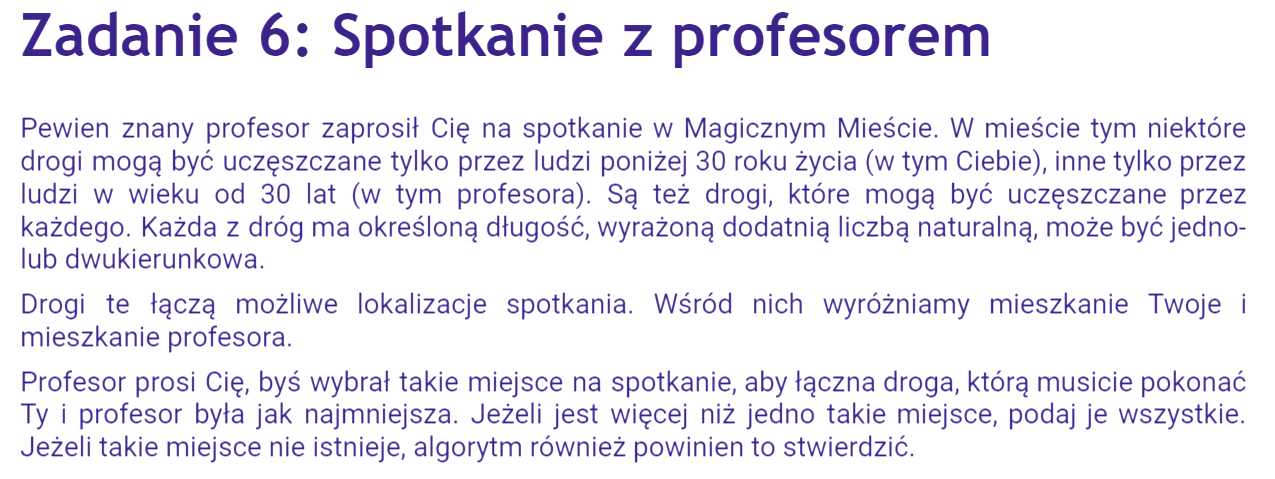

### Ogólne wprowadzenie

Zadanie jest dosyć proste i jedyną trudnością jest dobre zbudowanie grafu z oznaczeniem odpowiednich krawędzi oraz dostosowanie algorytmu Dijkstry w taki sposób, by uwzględniał jedynie ścieżki, którymi dana osoba może się poruszać. Poniżej zaimplementowałem dwie różne wersje. Sam rezultat będziemy wyznaczać, przechodząc liniowo równocześnie przez tablicę odległości najkrótszych ścieżek do kolejnych punktów (wierzchołków) od mieszkania profesora oraz przez tablicę odległości od mojego mieszkania i sprawdzająć, dla jakiego wierzchołka otrzymamy minimalną sumę odległości. Taki wierzchołek będzie naszym rowzwiązaniem (jeżeli jest kilka takich, dla których suma odległości jest taka sama jak najmniejsza suma, to zapisujemy wszystkie wierzchołki, dla których otrzymujemy taką sumę). Jeżeli są jakieś wierzchołki, do których profesor lub ja nie możemy dotrzeć, to w długości ścieżki dla takich wierzchołków pozostanie niezmodyfikowana wartość $ \infty $, jaką wpisaliśmy podczas inicjalizacji tablicy, a więc na pewno nie wybierzemy takiego punktu jako rozwiązanie. Jeżeli jednak dla każdego z punktów otrzymamy sumę równą $ \infty $, czyli albo ja, albo profesor, nie możemy dotrzeć do tego punktu, oznacza to, że nie istnieje miejsce, w którym możemy się spotkać.

###### UWAGA
Ponieważ nie jest nic powiedzianie, w jakiej postaci otrzymujemy dane na wejściu, zakładam, że na wejsciu dostajemy listę piątek postaci: <br>
$ (u, v, direction, age\_limit, length) $, gdzie: <br>
- $ u $ - wierzchołek, w którym zaczyna się ścieżka,
- $ v $ - wierzchołek, w którym zaczyna się ścieżka,
- $ direction $ - $ 1 $, jeżeli ścieżka jest jednokierunkowa i prowadzi z $ u $ do $ v $ lub $ 2 $, gdy ścieżka jest dwukierunkowa,
- $ age\_limit $ - $ 0 $, jeżeli ścieżką może uczęszczać każdy, $ -1 $, gdy jest tylko dla osób poniżej $ 30 $ roku życia, $ 1 $, gdy jest tylko dla osób, które mają przynajmniej $ 30 $ lat,
- $ length $ - długość ścieżki,

# Wersja I

### Omówienie algorytmu

Ten algorytm jest nieco łatwiejszą wersją, ponieważ opiera się jedynie na odpowiednim zbudowaniu grafu, przez co nie wprowadzamy absolutnie żadnych zmian w algorytmie Dijkstry. Wystarczy zbudować osobno graf dla mnie, który składa się ze wszystkich ścieżek, które mogę ja uczęszczać (czyli tych dla ludzi poniżej 30 roku życia oraz tych dla wszystkich), a także osobny graf dla profesora (składający się ze ścieżek dla ludzi, którzy mają przynajmniej 30 lat i ścieżek uczęszczanych przez wszystkich). Następnie dla grafu dla siebie (już bez rozróżniania ścieżek) wywołuję algorytm Dijkstry z wierzchołka, który odpowiada mojemu miejscu zamieszkania i wyznaczam długości najkrótszych ścieżek do wysztkich punktów. Podobnie robię dla profesora, tylko startuję Dijkstrę z jego domu. Następnie, gdy otrzymam już tablice odległości dla mnie i dla profesora, szukam optymalnego rozwiązania w taki sposób, jak zostało to opisane wyżej.

### Złożoność

###### Obliczeniowa:
$ O(V + E + E \cdot log(V)) = O(E \cdot log(V)) $
###### Pamięciowa:
$ O(V + E) $

### Implementacja

In [26]:
from queue import PriorityQueue


def dijkstra(G: 'graph represented by adjacency lists', s: 'source'):
    n = len(G)
    inf = float('inf')
    weights = [inf] * n
    # This variable is a counter of vertices remaining which we still
    # have to find shortest paths to
    to_relax = n
    pq = PriorityQueue()
    pq.put((0, s))

    while not pq.empty() and to_relax:
        min_w, u = pq.get()
        # We will find the minimum total weight path only once so the
        # code below this if statement will be executed only once
        if min_w < weights[u]:
            weights[u] = min_w
            to_relax -= 1
            # Add all the neighbours of the u vertex to the priority queue
            for v, weight in G[u]:
                if weights[v] == inf:
                    pq.put((weights[u] + weight, v))
                
    return weights


def add_edge(G, u, v, direction, length):
    G[u].append((v, length))
    if direction == 2:
        G[v].append((u, length))


def create_graphs(P):
    n = 0
    for p in P:
        n = max(n, p[0], p[1])
    n += 1
    
    my_G   = [[] for _ in range(n)]
    prof_G = [[] for _ in range(n)]
    
    for u, v, direction, limit, length in P:
        # If it is a path for everybody
        if limit == 0:
            add_edge(my_G, u, v, direction, length)
            add_edge(prof_G, u, v, direction, length)
        # If it is only professor's path
        elif limit == 1:
            add_edge(prof_G, u, v, direction, length)
        # If it is only my path
        elif limit == -1:
            add_edge(my_G, u, v, direction, length)
            
    return my_G, prof_G


def meeting_places(P: 'array of paths segments', 
                   a: 'index of a vertex where is my home',
                   b: 'index of a vertex where is a professor\'s home'):
    inf = float('inf')
    my_G, prof_G = create_graphs(P)
    n = len(my_G)
    my_dist = dijkstra(my_G, a)
    prof_dist = dijkstra(prof_G, b)
    
    min_dist = inf
    result = []
    for i in range(n):
        curr_dist = my_dist[i] + prof_dist[i]
        if curr_dist < min_dist:
            result = [i]
            min_dist = curr_dist
        elif curr_dist == min_dist:
            result.append(i)
    
    # There is no possible meeting place
    if not result: return -1, []
    
    return min_dist, result

###### Kilka testów

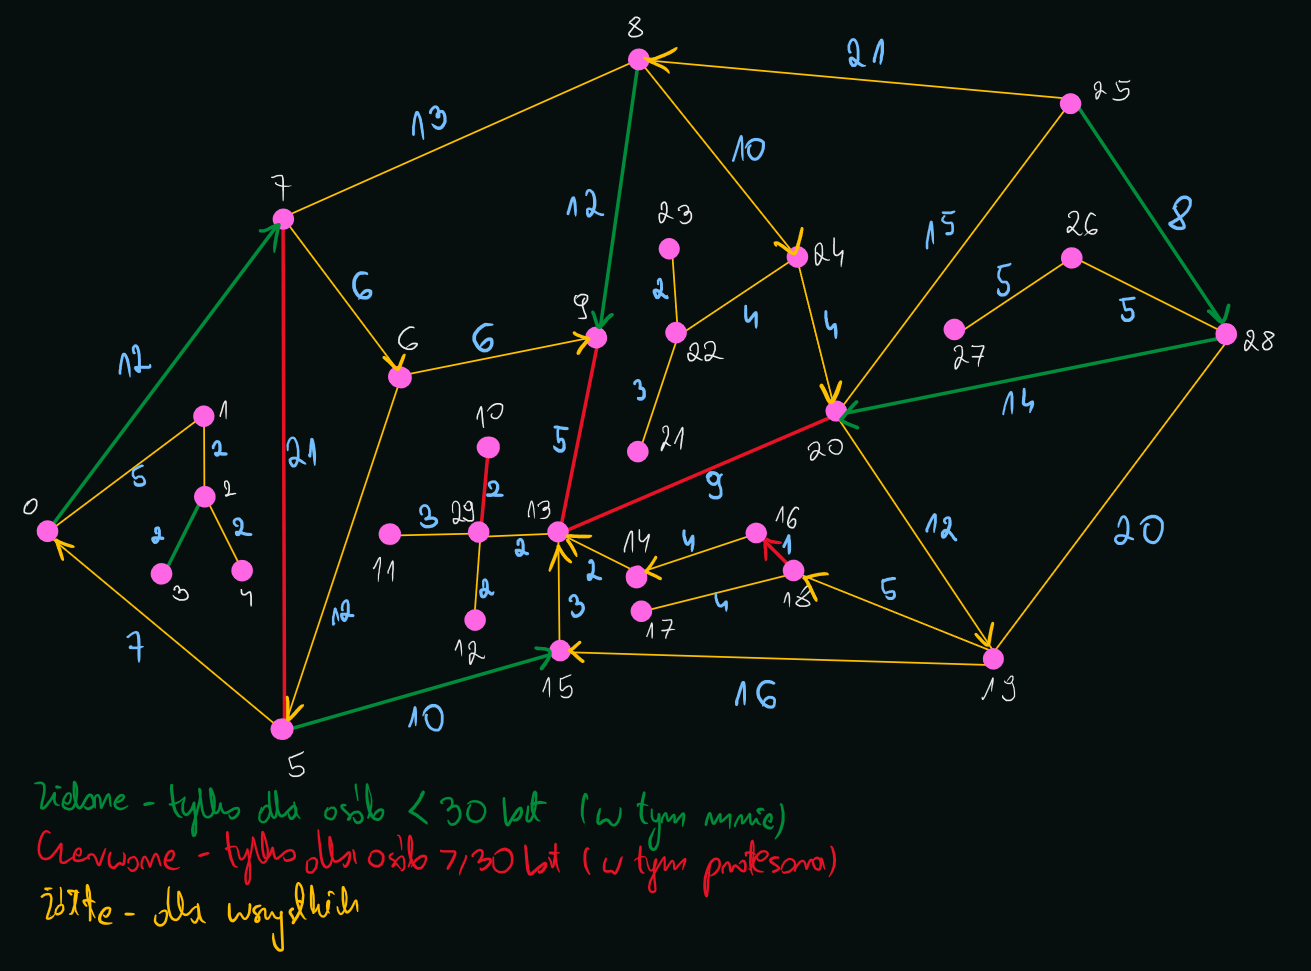

In [27]:
P = [(0, 7, 1, -1, 12), (0, 1, 2, 0, 5), (1, 2, 2, 0, 2), (2, 3, 2, -1, 2), (2, 4, 2, 0, 2), 
     (5, 0, 1, 0, 7), (5, 7, 2, 1, 21), (5, 15, 1, -1, 10), (6, 9, 1, 0, 6), (6, 5, 1, 0, 12), 
     (7, 6, 1, 0, 6), (7, 8, 2, 0, 13), (8, 9, 1, -1, 12), (8, 24, 1, 0, 10), (9, 13, 2, 1, 5), 
     (10, 29, 2, 1, 2), (11, 29, 2, 0, 3), (12, 29, 2, 0, 2), (13, 29, 2, 0, 2), (13, 20, 2, 1, 9), 
     (14, 13, 1, 0, 2), (15, 13, 1, 0, 3), (16, 14, 1, 0, 4), (17, 18, 2, 0, 4), (18, 16, 1, 1, 1), 
     (19, 28, 2, 0, 20), (19, 18, 1, 0, 5), (19, 15, 1, 0, 16), (20, 19, 1, 0, 12), (20, 25, 2, 0, 15), 
     (21, 22, 2, 0, 3), (22, 23, 2, 0, 2), (22, 24, 2, 0, 4), (24, 20, 1, 0, 4), (25, 28, 1, -1, 8), 
     (25, 8, 1, 0, 21), (26, 27, 2, 0, 5), (26, 28, 2, 0, 5), (28, 20, 1, -1, 14)]

a = 3
b = 10

print(meeting_places(P, a, b))

(42, [9])


### (Dodatkowo) Odtwarzanie ścieżek moich i profesora

In [31]:
from queue import PriorityQueue


def dijkstra(G: 'graph represented by adjacency lists', s: 'source'):
    n = len(G)
    inf = float('inf')
    weights = [inf] * n
    parents = [None] * n
    # This variable is a counter of vertices remaining which we still
    # have to find shortest paths to
    to_relax = n
    pq = PriorityQueue()
    pq.put((0, s, None))

    while not pq.empty() and to_relax:
        min_w, u, parent = pq.get()
        # We will find the minimum total weight path only once so the
        # code below this if statement will be executed only once
        if min_w < weights[u]:
            weights[u] = min_w
            parents[u] = parent
            to_relax -= 1
            # Add all the neighbours of the u vertex to the priority queue
            for v, weight in G[u]:
                if weights[v] == inf:
                    pq.put((weights[u] + weight, v, u))
                
    return weights, parents


def add_edge(G, u, v, direction, length):
    G[u].append((v, length))
    if direction == 2:
        G[v].append((u, length))


def create_graphs(P):
    n = 0
    for p in P:
        n = max(n, p[0], p[1])
    n += 1
    
    my_G   = [[] for _ in range(n)]
    prof_G = [[] for _ in range(n)]
    
    for u, v, direction, limit, length in P:
        # If it is a path for everybody
        if limit == 0:
            add_edge(my_G, u, v, direction, length)
            add_edge(prof_G, u, v, direction, length)
        # If it is only professor's path
        elif limit == 1:
            add_edge(prof_G, u, v, direction, length)
        # If it is only my path
        elif limit == -1:
            add_edge(my_G, u, v, direction, length)
            
    return my_G, prof_G


def get_path(parents, t):
    path = []
    
    while t is not None:
        path.append(t)
        t = parents[t]
        
    path.reverse()
    return path


def meeting_places(P: 'array of paths segments', 
                   a: 'index of a vertex where is my home',
                   b: 'index of a vertex where is a professor\'s home'):
    inf = float('inf')
    my_G, prof_G = create_graphs(P)
    n = len(my_G)
    my_dist, my_parents = dijkstra(my_G, a)
    prof_dist, prof_parents = dijkstra(prof_G, b)
    
    min_dist = inf
    result = []
    for i in range(n):
        curr_dist = my_dist[i] + prof_dist[i]
        if curr_dist < min_dist:
            result = [i]
            min_dist = curr_dist
        elif curr_dist == min_dist:
            result.append(i)
    
    # There is no possible meeting place
    if not result: return -1, []
    
    for i in range(len(result)):
        result[i] = (result[i], get_path(my_parents, result[i]), get_path(prof_parents, result[i]))
        
    return min_dist, result

###### Kilka testów

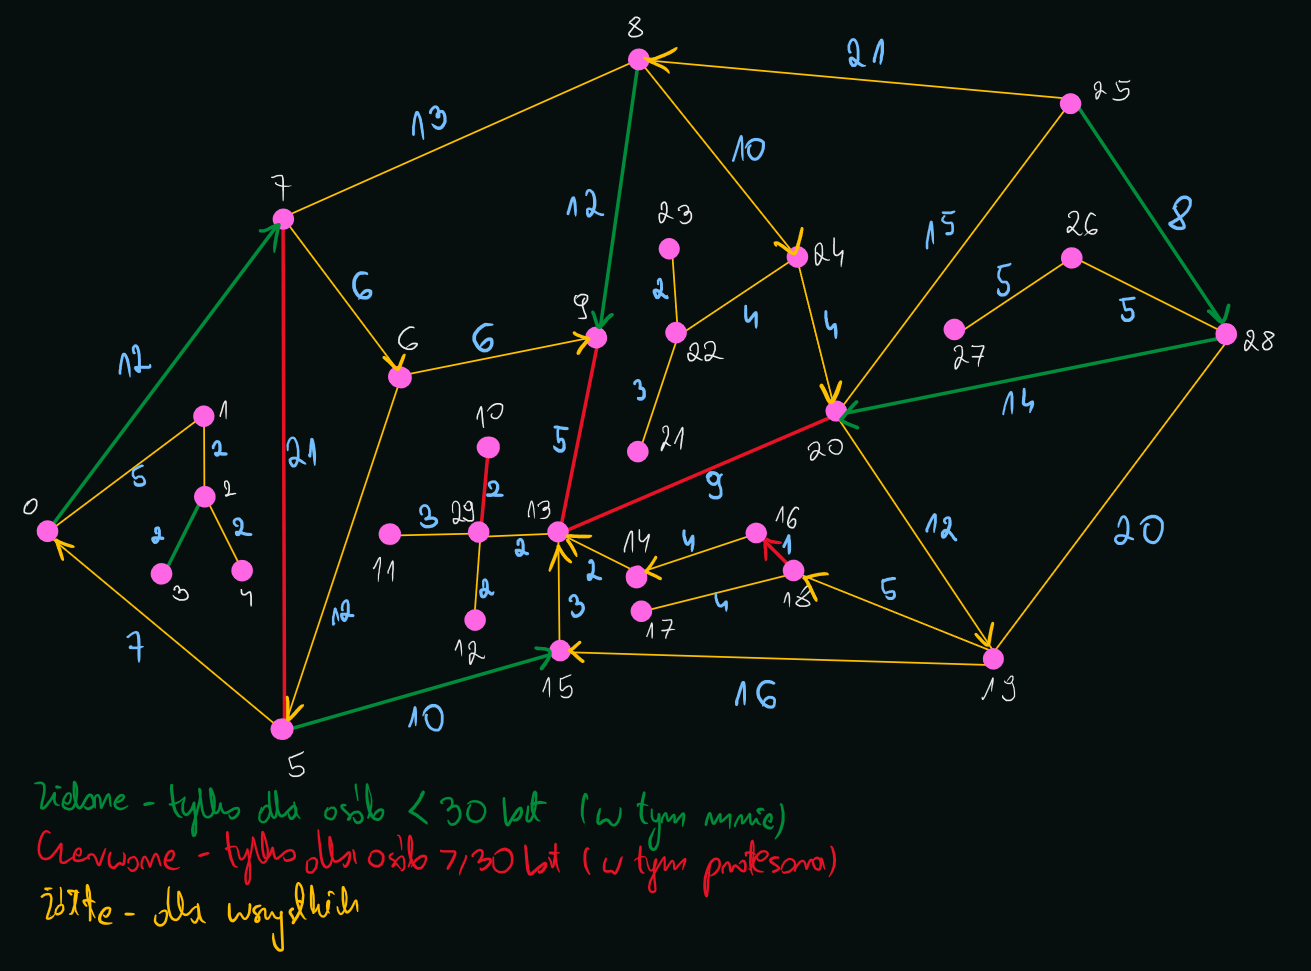

In [40]:
P = [(0, 7, 1, -1, 12), (0, 1, 2, 0, 5), (1, 2, 2, 0, 2), (2, 3, 2, -1, 2), (2, 4, 2, 0, 2), 
     (5, 0, 1, 0, 7), (5, 7, 2, 1, 21), (5, 15, 1, -1, 10), (6, 9, 1, 0, 6), (6, 5, 1, 0, 12), 
     (7, 6, 1, 0, 6), (7, 8, 2, 0, 13), (8, 9, 1, -1, 12), (8, 24, 1, 0, 10), (9, 13, 2, 1, 5), 
     (10, 29, 2, 1, 2), (11, 29, 2, 0, 3), (12, 29, 2, 0, 2), (13, 29, 2, 0, 2), (13, 20, 2, 1, 9), 
     (14, 13, 1, 0, 2), (15, 13, 1, 0, 3), (16, 14, 1, 0, 4), (17, 18, 2, 0, 4), (18, 16, 1, 1, 1), 
     (19, 28, 2, 0, 20), (19, 18, 1, 0, 5), (19, 15, 1, 0, 16), (20, 19, 1, 0, 12), (20, 25, 2, 0, 15), 
     (21, 22, 2, 0, 3), (22, 23, 2, 0, 2), (22, 24, 2, 0, 4), (24, 20, 1, 0, 4), (25, 28, 1, -1, 8), 
     (25, 8, 1, 0, 21), (26, 27, 2, 0, 5), (26, 28, 2, 0, 5), (28, 20, 1, -1, 14)]


def test(a: 'my home index', b: 'professor\'s home index'):
    dist, places = meeting_places(P, a, b)
    print('Shortest distance sum:', dist)
    print('Can meet in places (everywhere with the same minimum distance):')
    for i, my_path, prof_path in places:
        print(f' - Place {i:<2}')
        print('\tMy path:           ', ' -> '.join(map(str, my_path)))
        print('\tProfessor\'s path:  ', ' -> '.join(map(str, prof_path)))

In [41]:
test(3, 10)

Shortest distance sum: 42
Can meet in places (everywhere with the same minimum distance):
 - Place 9 
	My path:            3 -> 2 -> 1 -> 0 -> 7 -> 6 -> 9
	Professor's path:   10 -> 29 -> 13 -> 9


In [42]:
test(7, 17)

Shortest distance sum: 28
Can meet in places (everywhere with the same minimum distance):
 - Place 9 
	My path:            7 -> 6 -> 9
	Professor's path:   17 -> 18 -> 16 -> 14 -> 13 -> 9


In [44]:
test(28, 0)  # Profesor nie może się ruszyć

Shortest distance sum: 88
Can meet in places (everywhere with the same minimum distance):
 - Place 0 
	My path:            28 -> 20 -> 25 -> 8 -> 7 -> 6 -> 5 -> 0
	Professor's path:   0


In [45]:
test(28, 7)

Shortest distance sum: 40
Can meet in places (everywhere with the same minimum distance):
 - Place 20
	My path:            28 -> 20
	Professor's path:   7 -> 6 -> 9 -> 13 -> 20


In [47]:
test(19, 27)

Shortest distance sum: 30
Can meet in places (everywhere with the same minimum distance):
 - Place 19
	My path:            19
	Professor's path:   27 -> 26 -> 28 -> 19
 - Place 26
	My path:            19 -> 28 -> 26
	Professor's path:   27 -> 26
 - Place 27
	My path:            19 -> 28 -> 26 -> 27
	Professor's path:   27
 - Place 28
	My path:            19 -> 28
	Professor's path:   27 -> 26 -> 28


# Wersja II

### Omówienie algorytmu

Budujemy graf ze wszystkich krawędzi na raz, dodając poza wagą krawędzi dodatkowy parametr, który będzie oznaczał to, kto może się nią poruszać ($ True $, jeżeli porusza się osoba poniżej $ 30 $ roku życia (ja) lub $ False $, jeżeli porusza się osoba, która ma przynajmniej $ 30 $ lat (profesor)). Następnie zmieniamy algorytm Dijkstry, dodając mu jeden paremetr, który będzie wskazywał, czy w danym momencie idzie profesor, czy ja. W zależności od tego parametru, wybieramy odpowiednio dostępne ścieżki i wyznaczymy najkrótsze ścieżki do wszystkich pozostałych wierzchołków. Następnie postępujemy już jak wcześniej i szukamy punktu spotkania.

### Złożoność

###### Obliczeniowa:
$ O(V + E + E \cdot log(V)) = O(E \cdot log(V)) $
###### Pamięciowa:
$ O(V + E) $

### Implementacja

In [1]:
from queue import PriorityQueue


def dijkstra(G: 'graph represented by adjacency lists', 
             s: 'source', 
             flag: 'boolean value which indicates is moves a person below 30 years old or above'):
    n = len(G)
    inf = float('inf')
    weights = [inf] * n
    # This variable is a counter of vertices remaining which we still
    # have to find shortest paths to
    to_relax = n
    pq = PriorityQueue()
    pq.put((0, s))

    while not pq.empty() and to_relax:
        min_w, u = pq.get()
        # We will find the minimum total weight path only once so the
        # code below this if statement will be executed only once
        if min_w < weights[u]:
            weights[u] = min_w
            to_relax -= 1
            # Add all the neighbours of the u vertex to the priority queue
            for v, weight, age_limit in G[u]:
                if weights[v] == inf and (flag and age_limit <= 0) or (not flag and age_limit >= 0):
                    pq.put((weights[u] + weight, v))
                
    return weights


def create_graph(P):
    n = 0
    for p in P:
        n = max(n, p[0], p[1])
    n += 1
    
    G = [[] for _ in range(n)]
    
    for u, v, direction, limit, length in P:
        G[u].append((v, length, limit))
        if direction == 2:
            G[v].append((u, length, limit))
            
    return G


def meeting_places(P: 'array of paths segments', 
                   a: 'index of a vertex where is my home',
                   b: 'index of a vertex where is a professor\'s home'):
    inf = float('inf')
    G = create_graph(P)
    n = len(G)
    my_dist = dijkstra(G, a, True)  # True if moves a person below 30 years old
    prof_dist = dijkstra(G, b, False)  # False if moves a person who is at least 30
    
    min_dist = inf
    result = []
    for i in range(n):
        curr_dist = my_dist[i] + prof_dist[i]
        if curr_dist < min_dist:
            result = [i]
            min_dist = curr_dist
        elif curr_dist == min_dist:
            result.append(i)
    
    # There is no possible meeting place
    if not result: return -1, []
    
    return min_dist, result

###### Kilka testów

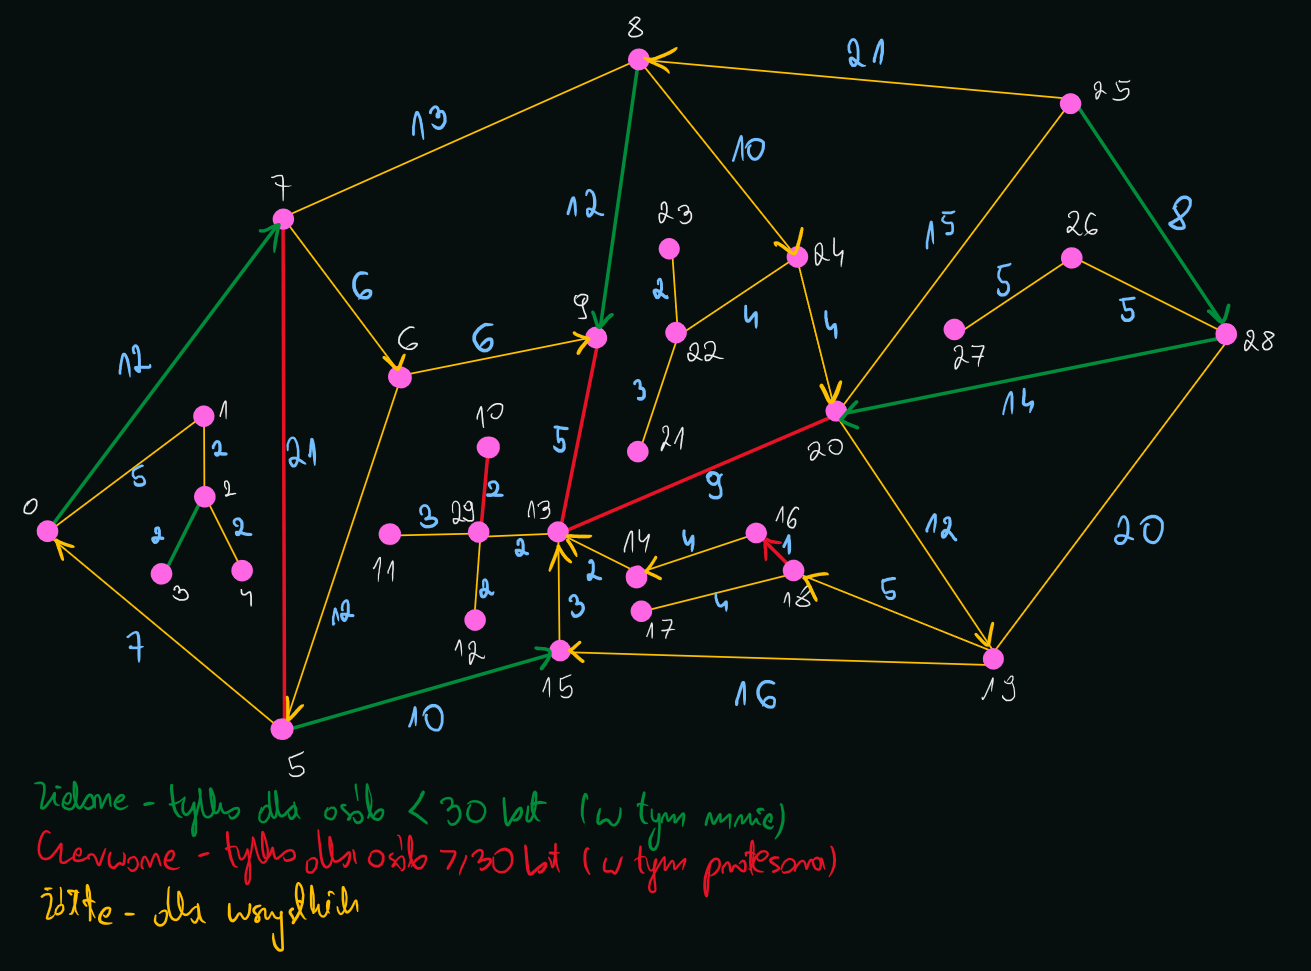

In [2]:
P = [(0, 7, 1, -1, 12), (0, 1, 2, 0, 5), (1, 2, 2, 0, 2), (2, 3, 2, -1, 2), (2, 4, 2, 0, 2), 
     (5, 0, 1, 0, 7), (5, 7, 2, 1, 21), (5, 15, 1, -1, 10), (6, 9, 1, 0, 6), (6, 5, 1, 0, 12), 
     (7, 6, 1, 0, 6), (7, 8, 2, 0, 13), (8, 9, 1, -1, 12), (8, 24, 1, 0, 10), (9, 13, 2, 1, 5), 
     (10, 29, 2, 1, 2), (11, 29, 2, 0, 3), (12, 29, 2, 0, 2), (13, 29, 2, 0, 2), (13, 20, 2, 1, 9), 
     (14, 13, 1, 0, 2), (15, 13, 1, 0, 3), (16, 14, 1, 0, 4), (17, 18, 2, 0, 4), (18, 16, 1, 1, 1), 
     (19, 28, 2, 0, 20), (19, 18, 1, 0, 5), (19, 15, 1, 0, 16), (20, 19, 1, 0, 12), (20, 25, 2, 0, 15), 
     (21, 22, 2, 0, 3), (22, 23, 2, 0, 2), (22, 24, 2, 0, 4), (24, 20, 1, 0, 4), (25, 28, 1, -1, 8), 
     (25, 8, 1, 0, 21), (26, 27, 2, 0, 5), (26, 28, 2, 0, 5), (28, 20, 1, -1, 14)]

a = 3
b = 10

print(meeting_places(P, a, b))

(42, [9])


### (Dodatkowo) Odtwarzanie ścieżek moich i profesora

In [3]:
from queue import PriorityQueue


def dijkstra(G: 'graph represented by adjacency lists', 
             s: 'source', 
             flag: 'boolean value which indicates is moves a person below 30 years old or above'):
    n = len(G)
    inf = float('inf')
    weights = [inf] * n
    parents = [None] * n
    # This variable is a counter of vertices remaining which we still
    # have to find shortest paths to
    to_relax = n
    pq = PriorityQueue()
    pq.put((0, s, None))

    while not pq.empty() and to_relax:
        min_w, u, parent = pq.get()
        # We will find the minimum total weight path only once so the
        # code below this if statement will be executed only once
        if min_w < weights[u]:
            weights[u] = min_w
            parents[u] = parent
            to_relax -= 1
            # Add all the neighbours of the u vertex to the priority queue
            for v, weight, age_limit in G[u]:
                if weights[v] == inf and (flag and age_limit <= 0) or (not flag and age_limit >= 0):
                    pq.put((weights[u] + weight, v, u))
                
    return weights, parents


def create_graph(P):
    n = 0
    for p in P:
        n = max(n, p[0], p[1])
    n += 1
    
    G = [[] for _ in range(n)]
    
    for u, v, direction, limit, length in P:
        G[u].append((v, length, limit))
        if direction == 2:
            G[v].append((u, length, limit))
            
    return G


def get_path(parents, t):
    path = []
    
    while t is not None:
        path.append(t)
        t = parents[t]
        
    path.reverse()
    return path


def meeting_places(P: 'array of paths segments', 
                   a: 'index of a vertex where is my home',
                   b: 'index of a vertex where is a professor\'s home'):
    inf = float('inf')
    G = create_graph(P)
    n = len(G)
    my_dist, my_parents = dijkstra(G, a, True)  # True if moves a person below 30 years old
    prof_dist, prof_parents = dijkstra(G, b, False)  # False if moves a person who is at least 30
    
    min_dist = inf
    result = []
    for i in range(n):
        curr_dist = my_dist[i] + prof_dist[i]
        if curr_dist < min_dist:
            result = [i]
            min_dist = curr_dist
        elif curr_dist == min_dist:
            result.append(i)
    
    # There is no possible meeting place
    if not result: return -1, []
    
    for i in range(len(result)):
        result[i] = (result[i], get_path(my_parents, result[i]), get_path(prof_parents, result[i]))
        
    return min_dist, result

###### Kilka testów

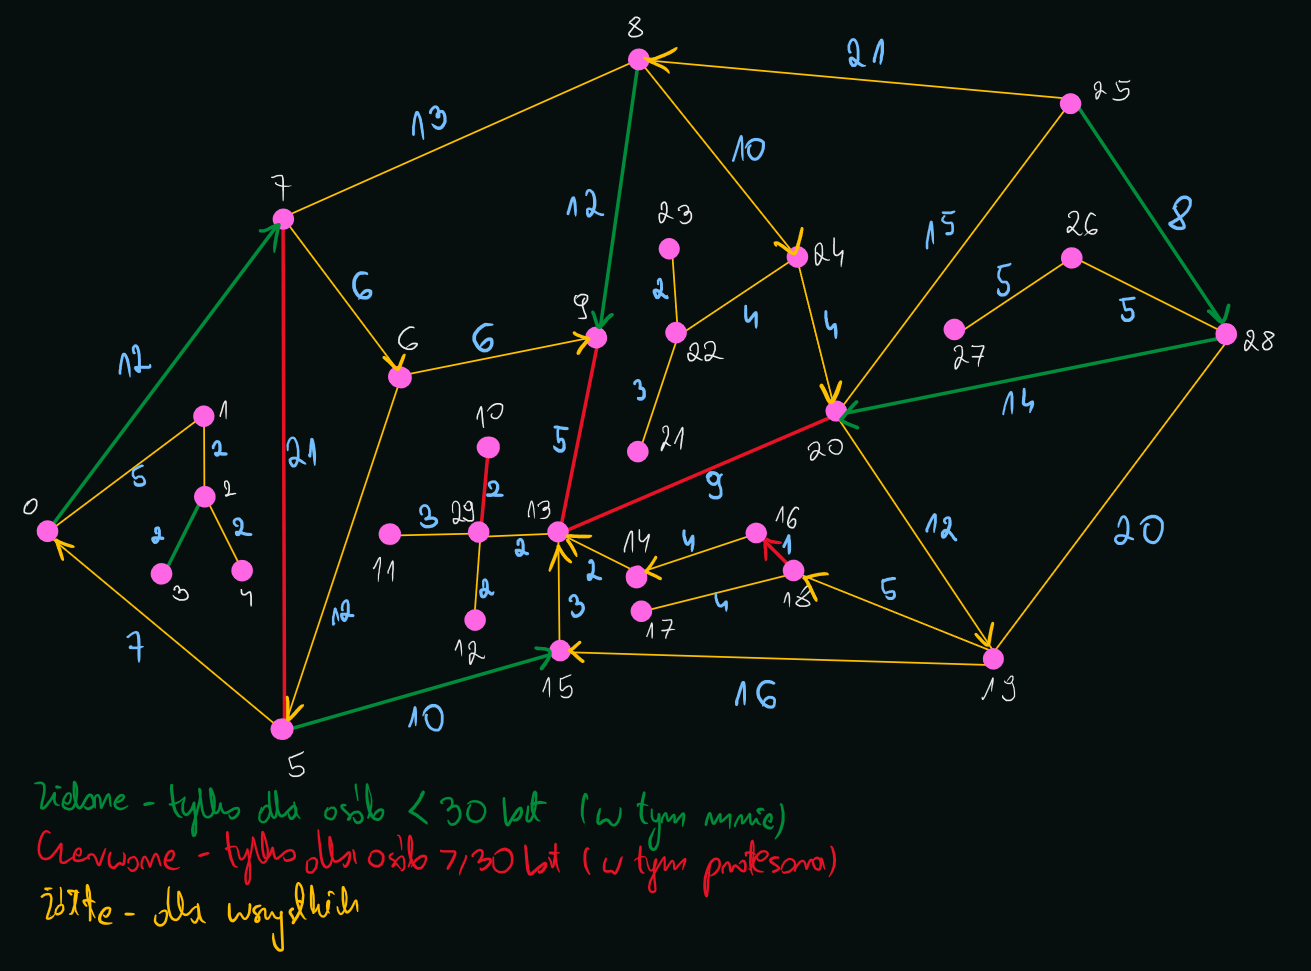

In [4]:
P = [(0, 7, 1, -1, 12), (0, 1, 2, 0, 5), (1, 2, 2, 0, 2), (2, 3, 2, -1, 2), (2, 4, 2, 0, 2), 
     (5, 0, 1, 0, 7), (5, 7, 2, 1, 21), (5, 15, 1, -1, 10), (6, 9, 1, 0, 6), (6, 5, 1, 0, 12), 
     (7, 6, 1, 0, 6), (7, 8, 2, 0, 13), (8, 9, 1, -1, 12), (8, 24, 1, 0, 10), (9, 13, 2, 1, 5), 
     (10, 29, 2, 1, 2), (11, 29, 2, 0, 3), (12, 29, 2, 0, 2), (13, 29, 2, 0, 2), (13, 20, 2, 1, 9), 
     (14, 13, 1, 0, 2), (15, 13, 1, 0, 3), (16, 14, 1, 0, 4), (17, 18, 2, 0, 4), (18, 16, 1, 1, 1), 
     (19, 28, 2, 0, 20), (19, 18, 1, 0, 5), (19, 15, 1, 0, 16), (20, 19, 1, 0, 12), (20, 25, 2, 0, 15), 
     (21, 22, 2, 0, 3), (22, 23, 2, 0, 2), (22, 24, 2, 0, 4), (24, 20, 1, 0, 4), (25, 28, 1, -1, 8), 
     (25, 8, 1, 0, 21), (26, 27, 2, 0, 5), (26, 28, 2, 0, 5), (28, 20, 1, -1, 14)]


def test(a: 'my home index', b: 'professor\'s home index'):
    dist, places = meeting_places(P, a, b)
    print('Shortest distance sum:', dist)
    print('Can meet in places (everywhere with the same minimum distance):')
    for i, my_path, prof_path in places:
        print(f' - Place {i:<2}')
        print('\tMy path:           ', ' -> '.join(map(str, my_path)))
        print('\tProfessor\'s path:  ', ' -> '.join(map(str, prof_path)))

In [5]:
test(3, 10)

Shortest distance sum: 42
Can meet in places (everywhere with the same minimum distance):
 - Place 9 
	My path:            3 -> 2 -> 1 -> 0 -> 7 -> 6 -> 9
	Professor's path:   10 -> 29 -> 13 -> 9


In [6]:
test(7, 17)

Shortest distance sum: 28
Can meet in places (everywhere with the same minimum distance):
 - Place 9 
	My path:            7 -> 6 -> 9
	Professor's path:   17 -> 18 -> 16 -> 14 -> 13 -> 9


In [7]:
test(28, 0)  # Profesor nie może się ruszyć

Shortest distance sum: 88
Can meet in places (everywhere with the same minimum distance):
 - Place 0 
	My path:            28 -> 20 -> 25 -> 8 -> 7 -> 6 -> 5 -> 0
	Professor's path:   0


In [8]:
test(28, 7)

Shortest distance sum: 40
Can meet in places (everywhere with the same minimum distance):
 - Place 20
	My path:            28 -> 20
	Professor's path:   7 -> 6 -> 9 -> 13 -> 20


In [9]:
test(19, 27)

Shortest distance sum: 30
Can meet in places (everywhere with the same minimum distance):
 - Place 19
	My path:            19
	Professor's path:   27 -> 26 -> 28 -> 19
 - Place 26
	My path:            19 -> 28 -> 26
	Professor's path:   27 -> 26
 - Place 27
	My path:            19 -> 28 -> 26 -> 27
	Professor's path:   27
 - Place 28
	My path:            19 -> 28
	Professor's path:   27 -> 26 -> 28
